In [2]:
# 📌 Experiment: SVM Classification on Cleaned Agricultural Wage Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("cleaned_agri_wages.csv")
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
print(df.head())

# Step 2: Create wage categories
def wage_category(x):
    if x < 150:
        return "Low"
    elif x < 300:
        return "Medium"
    else:
        return "High"

df["wage_category"] = df["monthly_average_wage"].apply(wage_category)

✅ Dataset loaded successfully.
Shape: (375913, 10)
        month state_name district_name  district_code  \
0  2010-07-01  Telangana      Adilabad            501   
1  2010-07-01  Telangana      Adilabad            501   
2  2010-07-01  Telangana      Adilabad            501   
3  2010-07-01  Telangana      Adilabad            501   
4  2010-07-01  Telangana      Adilabad            501   

             labour_category                labour_type gender  \
0               Field Labour               Field Labour    Men   
1               Field Labour               Field Labour  Women   
2                   Herdsmen                   Herdsmen    Men   
3  Other Agricultural Labour  Other Agricultural Labour    Men   
4  Other Agricultural Labour  Other Agricultural Labour  Women   

   monthly_average_wage  annual_average_wage  year  
0                  95.0               162.92  2010  
1                  80.0               140.00  2010  
2                 150.0               150.83  2010

In [3]:
# Step 3: Select features and target
features = ["state_name", "labour_type", "gender", "year"]
target = "wage_category"

X = df[features]
y = df[target]

In [4]:
# Step 4: Encode categorical variables
encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\HP\AppData\Local\Temp\ipykernel_24040\571361374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_24040\571361374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_24040\571361374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [5]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Step 7: Train the SVM Classifier (Optimized for Speed)

from sklearn.svm import LinearSVC
from sklearn.utils import resample

# Option 1: SAMPLE the dataset to train on fewer rows (for faster runtime)
X_train_sample, y_train_sample = resample(X_train, y_train,
                                          n_samples=20000,  # choose 10k–20k for faster results
                                          random_state=42,
                                          stratify=y_train)

# Option 2: Use a faster linear approximation instead of RBF kernel
svm_clf = LinearSVC(C=0.5, max_iter=5000, random_state=42)

# Train model
svm_clf.fit(X_train_sample, y_train_sample)

print("✅ Fast SVM Classifier training complete (using subset + Linear kernel).")


✅ Fast SVM Classifier training complete (using subset + Linear kernel).


In [7]:

# Step 8: Make predictions
y_pred = svm_clf.predict(X_test)

Let's reduce the dataset size to speed up training.

In [8]:
# Step 9: Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"\n📊 Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


📊 Accuracy: 60.95%

Classification Report:
              precision    recall  f1-score   support

        High       0.64      0.67      0.65     28433
         Low       0.68      0.21      0.33     10961
      Medium       0.58      0.68      0.63     35789

    accuracy                           0.61     75183
   macro avg       0.63      0.52      0.54     75183
weighted avg       0.62      0.61      0.59     75183



In [9]:

# Step 9: Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"\n📊 Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


📊 Accuracy: 60.95%

Classification Report:
              precision    recall  f1-score   support

        High       0.64      0.67      0.65     28433
         Low       0.68      0.21      0.33     10961
      Medium       0.58      0.68      0.63     35789

    accuracy                           0.61     75183
   macro avg       0.63      0.52      0.54     75183
weighted avg       0.62      0.61      0.59     75183



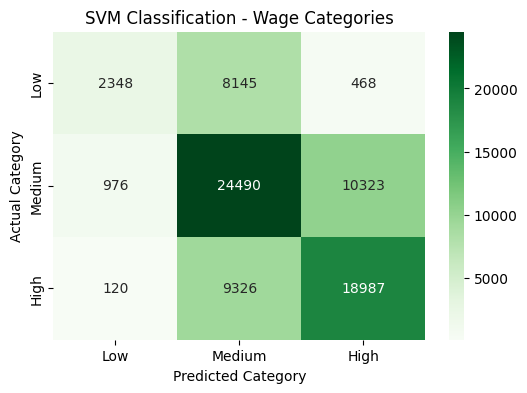

In [10]:
# Step 10: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("SVM Classification - Wage Categories")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()


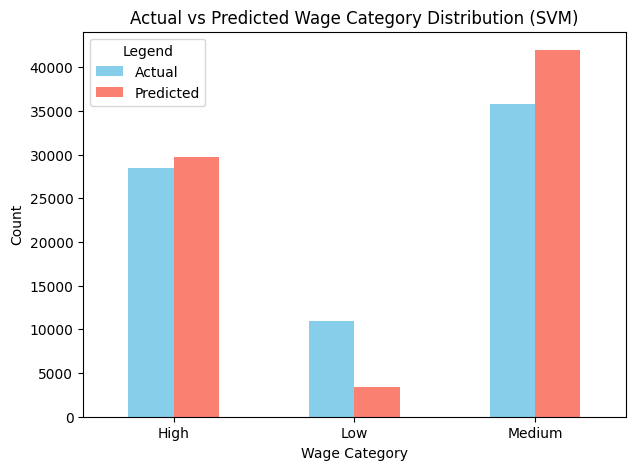

In [11]:
# Step 11: Bar Plot of Actual vs Predicted Class Distribution
actual_counts = y_test.value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

comparison_df = pd.DataFrame({"Actual": actual_counts, "Predicted": pred_counts})

comparison_df.plot(kind="bar", figsize=(7,5), color=["skyblue", "salmon"])
plt.title("Actual vs Predicted Wage Category Distribution (SVM)")
plt.xlabel("Wage Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Legend")
plt.show()


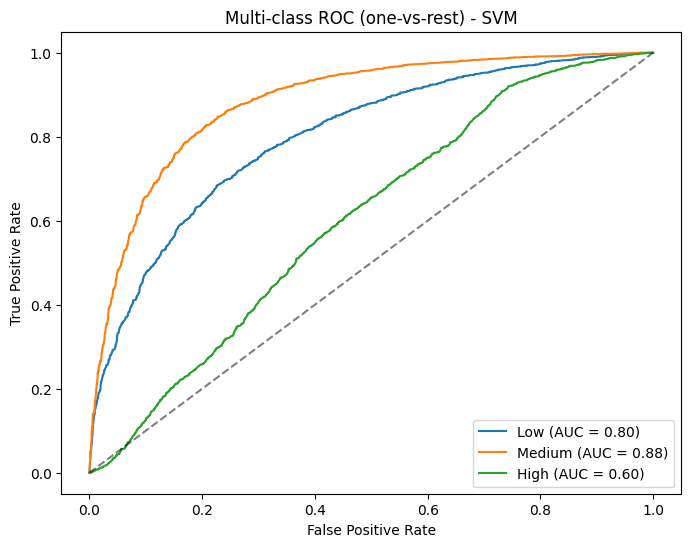

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define class labels (must match the target encoding used elsewhere)
labels = ["Low", "Medium", "High"]

# If using LinearSVC (no predict_proba), use decision_function
if hasattr(svm_clf, "decision_function"):
    scores = svm_clf.decision_function(X_test)  # shape (n_samples, n_classes) or (n_samples,)
else:
    scores = svm_clf.predict_proba(X_test)

# Binarize labels
le = LabelEncoder().fit(labels)
y_test_enc = le.transform(y_test)
y_test_bin = label_binarize(y_test_enc, classes=[0,1,2])  # adjust if classes encoded differently

plt.figure(figsize=(8,6))
for i, class_name in enumerate(labels):
    if scores.ndim == 1:  # binary decision_function
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores[:, i])
        roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC (one-vs-rest) - SVM")
plt.legend(loc="lower right")
plt.show()
